<a href="https://colab.research.google.com/github/ajit252001/house_price_prediction/blob/main/price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



*   pandas - used to perform data manipulation and analysis
*   numpy - used to perform a wide variety of mathematical operations on arrays
*   matplotlib - used for data visualization and graphical plotting
*   



In [2]:
# Creating object for training set DataFrame
train_DF = pd.read_csv('train.csv')

# Displaying first 5 rows of the DataFrame
train_DF.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
# Print column names
print(train_DF.columns)

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


In [12]:
# Print description of Boston housing data set
train_DF.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [6]:
# Getting information regarding the types of data
train_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [7]:
#preprocessing of dataset
# Checking if there is any empty row in particular or not
train_DF.isna().sum()

,0
ID,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0


In [8]:
#printing the target
print(train_DF['medv'])

0      24.0
1      21.6
2      33.4
3      36.2
4      22.9
       ... 
328    17.5
329    22.4
330    20.6
331    23.9
332    11.9
Name: medv, Length: 333, dtype: float64


In [11]:
# printing max and min target
print(train_DF['medv'].max())
print(train_DF['medv'].min())

50.0
5.0


Exploratory Data Analysis

In [13]:
# applying corelation
train_DF.corr()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1.000000,0.456312,-0.155639,0.421978,0.007958,0.440185,-0.112790,0.257300,-0.356461,0.707526,0.686246,0.309838,-0.271619,0.281953,-0.221694
crim,0.456312,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.155639,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.421978,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,0.007958,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.440185,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.112790,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.257300,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.356461,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.707526,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251


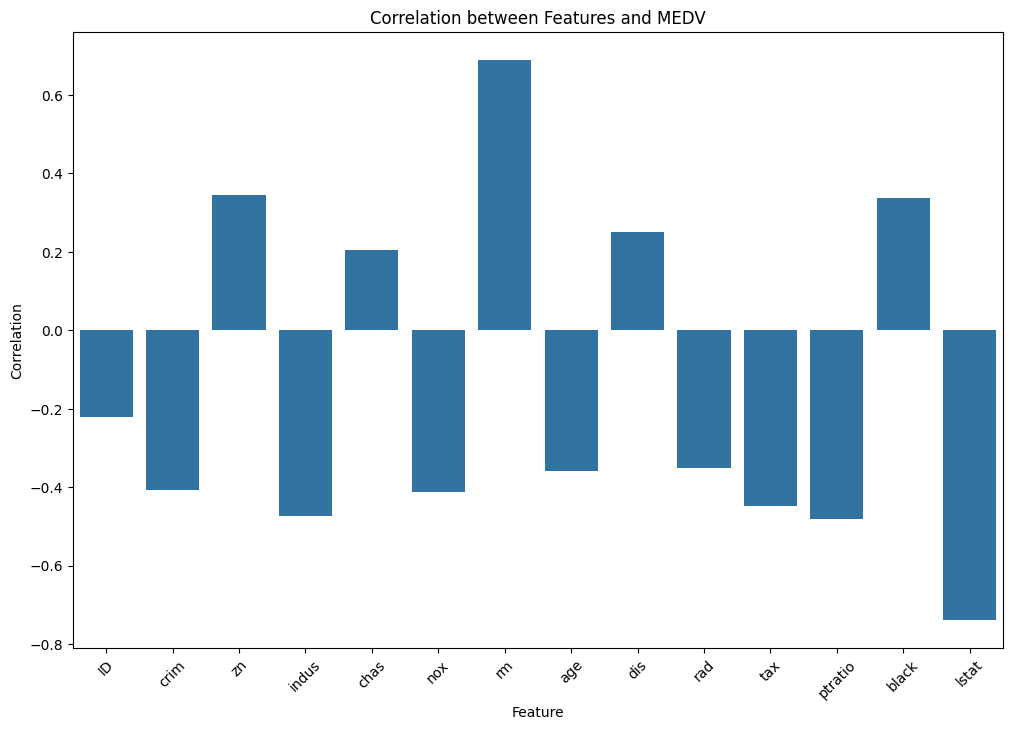

In [15]:
# plotting corelation of all features with target medv
# Calculate the correlation between all features and the target variable (MEDV)
correlations = train_DF.corr()['medv'].drop('medv')  # Exclude the correlation with itself

# Create a bar plot to visualize the correlations
plt.figure(figsize=(12, 8))
sns.barplot(x=correlations.index, y=correlations.values)
plt.title('Correlation between Features and MEDV')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

Positive Correlation:

* As one variable increases, the other also increases.
Example: Height and weight in humans. Taller individuals tend to weigh more.
Negative Correlation:

* As one variable increases, the other decreases.
Example: Study time and video game playing time. The more time someone spends studying, the less time they typically spend playing video games.

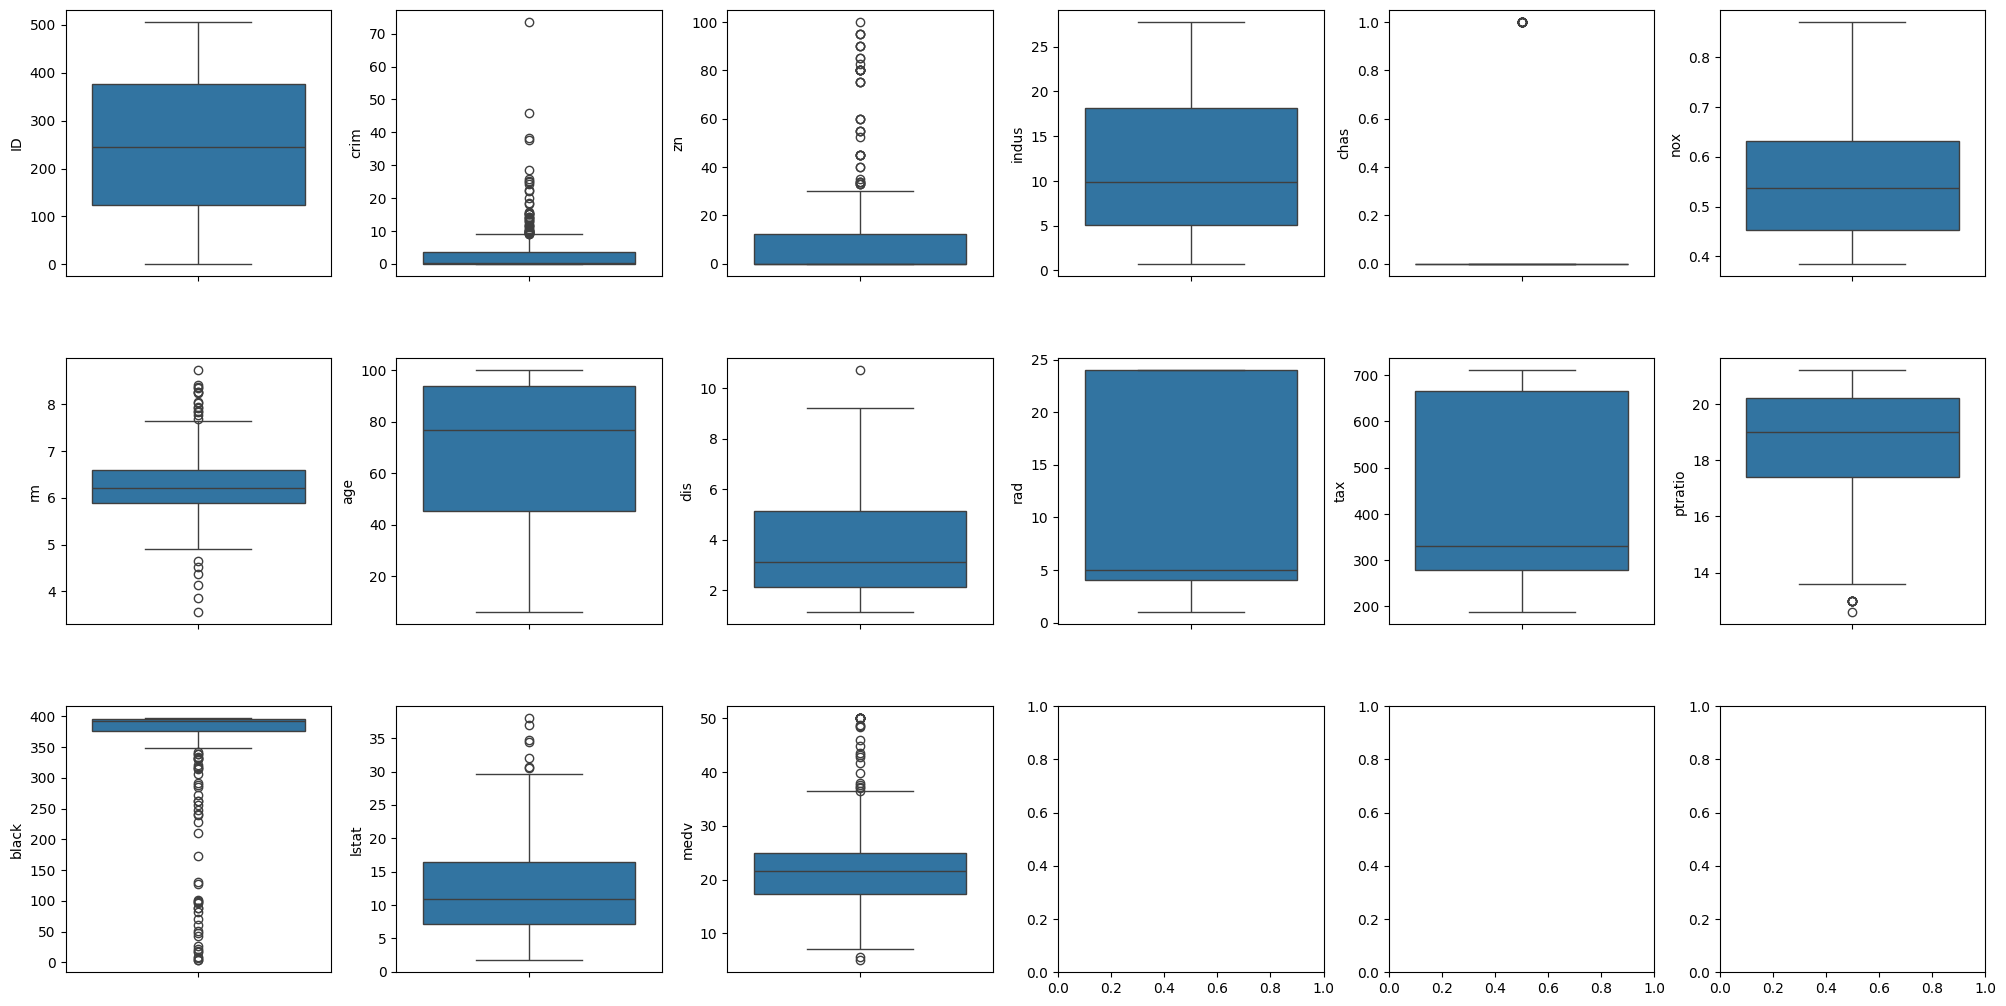

In [9]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=3, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in train_DF.items():
    sns.boxplot(y=col, data=train_DF, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Observation
* In the graph, the dots represent the outliers.
* The column containing many outliers does not follow the normal distribution.
* We can minimalize outliers with log transformation.
* We can also drop the column which contains outliers (or) we can delete the rows which contains the same.

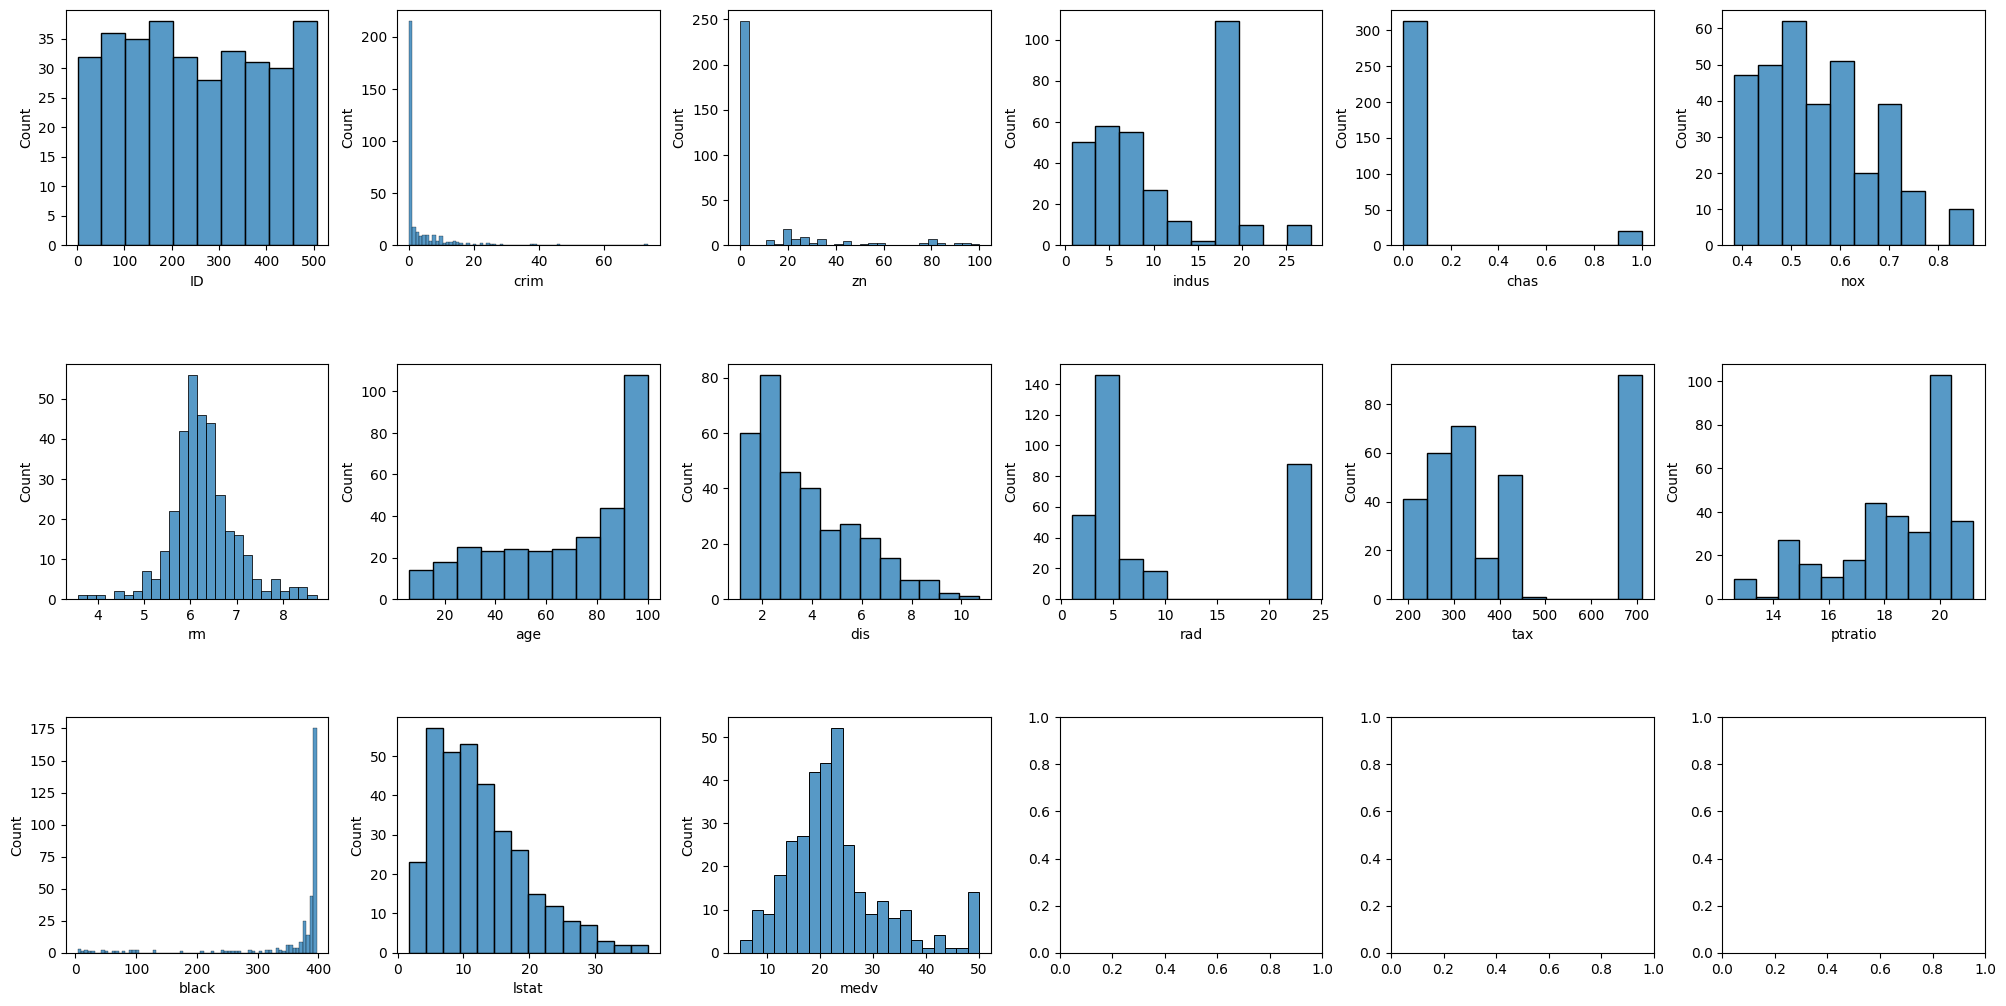

In [10]:
# create distribution plot
fig, ax = plt.subplots(ncols=6, nrows=3, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in train_DF.items():
    sns.histplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

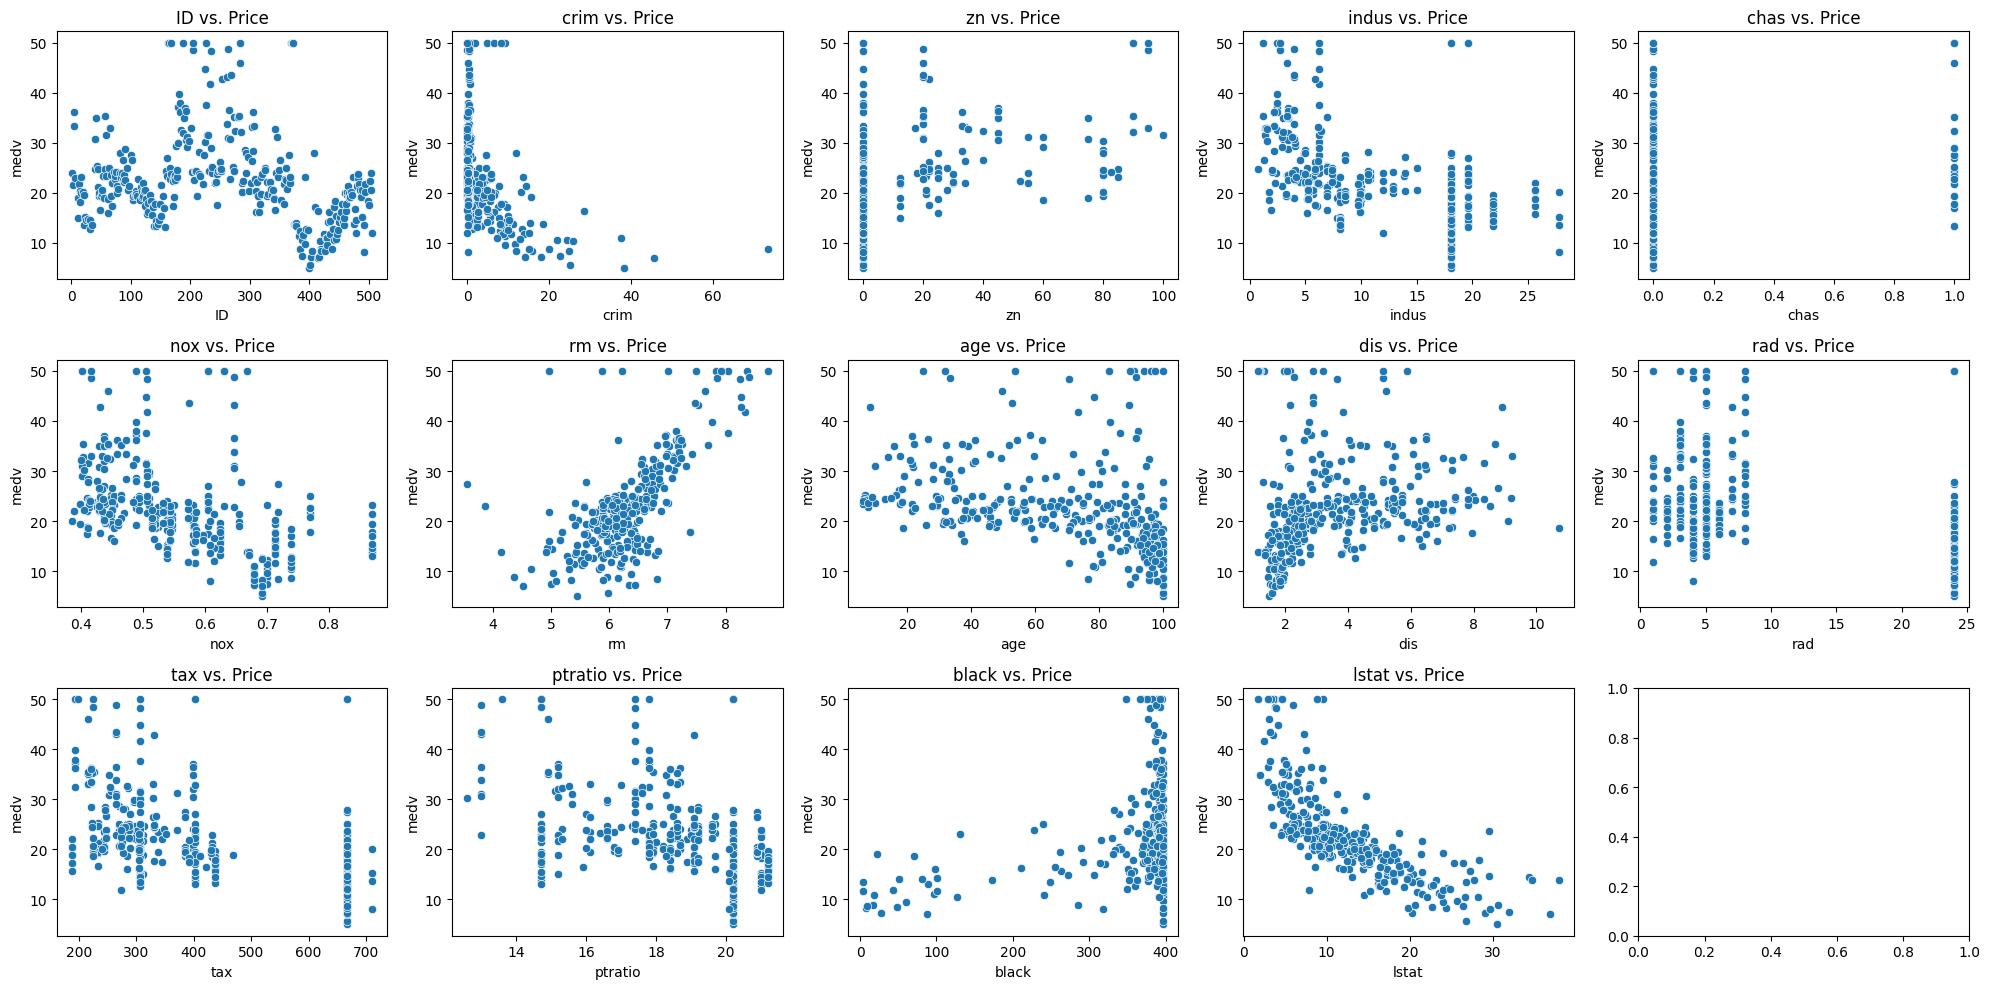

In [30]:
# scatter plot
# scatter plot
independent_vars = ['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat']

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 10)) # increased the figure size and changed the arrangement of subplots

axes = axes.flatten() # flatten the axes array for easier indexing

for i, var in enumerate(independent_vars):
    sns.scatterplot(x=var, y='medv', data=train_DF, ax=axes[i]) # use flattened array for indexing
    axes[i].set_title(f'{var} vs. Price')

plt.tight_layout()
plt.show()

Analyzing Scatter Plots

By plotting scatter plots of each feature against the target variable MEDV, you can gain insights into the relationships between these features and the house prices. Here are some potential observations:

In [31]:
# Training model on original data
X0 = train_DF.iloc[:,1:14].values # extracting independent variables
Y0 = train_DF.iloc[:,-1].values  # extracting last row i.e medv or target value
LR0 = LinearRegression()
LR0.fit(X0,Y0)
print("Intercept : ", LR0.intercept_)
print("Slope : ", LR0.coef_)

Intercept :  34.04543776350591
Slope :  [-5.24893379e-02  4.74448677e-02  5.38552422e-02  3.78486439e+00
 -1.57396571e+01  3.76883175e+00 -4.62660241e-03 -1.54882312e+00
  3.28967093e-01 -1.28664959e-02 -8.56975746e-01  1.16659048e-02
 -6.00315456e-01]
